# Final Project
### CHEM ENG/ SEP 786
### Mohammad Kashif Siddiqui - 0755452


### Headers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os 
import pandas as pd
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import random as rn
import sklearn.discriminant_analysis
import time
from sklearn import datasets
import subprocess


### Checking paths

In [2]:
print('current path:')
dir_path = os.getcwd()
print(dir_path)

current path:
C:\Users\User\AppData\Roaming\Python\Python35\Scripts\Allwork\SEP_786


# Read data 

#### Read data in pandas dataframe and transfer to numpy array

In [3]:
tic = time.clock()
data = pd.read_csv('EEG_modified.txt', header = None)
data = pd.DataFrame.to_numpy(data)
toc = time.clock()
print('Elapsed time to load data in seconds:', (toc - tic))

Elapsed time to load data in seconds: 0.052711999999999995


In [4]:
#data.shape

In [5]:
#data[0]

# Testing & Training Data Split

In [4]:
# Specify the data 
Input_data=data[:,0:14]

# Isolate labels
labels = data[:,14]

# Split the data up in train and test sets
train_data, test_data, train_label, test_label = train_test_split(Input_data, labels, test_size=0.10, random_state=42)

In [5]:
print('Training set data shape:', train_data.shape)
print('Testing set data shape:', test_data.shape) 
print('Training set label shape:', train_label.shape)
print('Testing set label shape:', test_label.shape)

Training set data shape: (13482, 14)
Testing set data shape: (1498, 14)
Training set label shape: (13482,)
Testing set label shape: (1498,)


In [6]:
print("train_data ex:", train_data[0])
print("train_label ex:", train_label[0])

train_data ex: [4258.97 4033.85 4281.54 4150.77 4381.54 4655.38 4106.67 4656.41 4228.72
 4242.56 4193.85 4287.18 4597.95 4321.03]
train_label ex: 1.0


# Approach 1: PCA

#### Implementing PCA Function:

In [7]:
#This is the function that Performs PCA
#It will be applied to both the test and train data sets

def PCA_func(X, num_feats=14, reduce=1, reduce_by=0):
    
    #print('Shape of the original training data is: ', X.shape)
    
    # Center the Means
    mean = np.mean(X)
    Xc = X - mean
    
    # EigenValue, EigenVector
    D,E = np.linalg.eig(np.dot(Xc.T,Xc))
    
    # Sort
    sortIndex = np.argsort(D)
    newE = np.zeros((num_feats, num_feats))
    index = 0
    for i in range(0,num_feats):
        newE[:,index] = E[:,sortIndex[i]]
        index = index + 1
    #print('Shape of the PCAs new basis (E) is:', newE.shape)
    
    # Reduce dimensions
    if reduce == 1 and reduce_by!= 0:  #if you must reduce, specify how much:
        newE_reduced = np.delete(newE, np.s_[0:reduce_by], axis=1)
        
        ##The function deletes the first column because that's the column with the lowest variance explained
        ## argsort sorts the data by lowest to highest, therefore the last column explains the most variance.
        
        #print('A reduction in size was performed!')
        #print('the new shape of E is: ', newE_reduced.shape)
    else:
        newE_reduced = newE
        #print('No size reduction performed!')
        
    # Reconstructing The data
    
    # Setting up the reconstruction using the formula below:
    # X_reconstructed = X_centered . (Eigenvector . (Eigenvector^T)) + np.mean(X_original)
    
    newE_reduced_transposed = np.dot(newE_reduced, newE_reduced.T)
    ynew = np.dot(Xc,newE_reduced_transposed)+mean
    
    # Return
    #print('ynew shape: ', ynew.shape)
    return ynew
    

#### Classification Method 1: Linear Discriminant Analysis

In [8]:
# Defining the linear discriminant analysis function
def FLD_func(train_inputs, train_labels, test_inputs, test_labels):
    
    tic = time.clock()
    # training set result without feature selection
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    #training
    lda.fit(train_inputs, train_labels)
    toc = time.clock()
    print('Elapsed training time in seconds:', (toc - tic))
    
    tic = time.clock()
    #testing
    prediction = lda.predict(test_inputs)
    toc = time.clock()
    print('Elapsed testing time in seconds:', (toc - tic))
    
    error = sum(abs(prediction - test_labels))
    print("total error rate = ", error/len(test_inputs))
    
    
    Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)
    
    return Conf_mat, error
    
    

### Performing PCA with LDA

Performing PCA with LDA
PCA features removed = 0
Elapsed training time in seconds: 0.03338510000000383
Elapsed testing time in seconds: 0.0004028999999974303
total error rate =  0.3664886515353805
Confusion Matrix:
[[629 190]
 [359 320]]
............................................................
PCA features removed = 1
Elapsed training time in seconds: 0.034450900000010165
Elapsed testing time in seconds: 0.0006415000000004056
total error rate =  0.37983978638184246
Confusion Matrix:
[[614 205]
 [364 315]]
............................................................
PCA features removed = 2
Elapsed training time in seconds: 0.03633019999999476
Elapsed testing time in seconds: 0.0006282999999882577
total error rate =  0.4499332443257677
Confusion Matrix:
[[581 238]
 [436 243]]
............................................................
PCA features removed = 3
Elapsed training time in seconds: 0.031921100000005254
Elapsed testing time in seconds: 0.0003755000000040809
total error ra

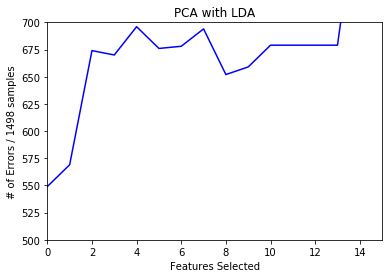

In [10]:
print('Performing PCA with LDA')
error = np.zeros((15,1))
for i in range (0,15):
    #print("\n")
    #print('............................................................')
    PCA = PCA_func(train_data, num_feats=14, reduce=1, reduce_by=i)
    #print('............................................................')
    #print('PCA features removed:', i)
    #print('reconstructed data:')
    #print(PCA)
    #print('............................................................')
    print('PCA features removed =',i)
    #print('Shape of testing data is: ', test_data.shape)
    confusion_matrix, error_fld1 = FLD_func(PCA, train_label, test_data, test_label)
    print('Confusion Matrix:')
    print(confusion_matrix)
    print('............................................................')
    error[i] = error_fld1
    
plt.figure()
plt.plot(error, c='b')
ax=plt.gca()
ax.set_xlim(0,15)
ax.set_ylim(500,700)
plt.title('PCA with LDA')
plt.xlabel("Features Selected")
plt.ylabel("# of Errors / 1498 samples")
plt.show()   

#### Classification Method 2: K-Nearest Neighbour

In [11]:
#data = numpy.loadtxt("Data_for_UCI_named.csv", delimiter = ',')

def KNN_func (train_datas, train_labels, test_datas, test_labels,K):
    Xtrain = train_datas
    Xtest = test_datas
    Xctrain =train_labels
    Xctest = test_labels

    length_train = train_datas.shape[0]
    length_test = test_datas.shape[0]

    k = K
    print('K value: ', k)
    dist = np.zeros(length_train)
    errors = np.zeros(length_test)
    conf = np.zeros(length_test)
    tic = time.clock()
    for i in range(length_test):

        dist = np.sum((Xtrain - Xtest[i,:])**2,axis = 1)**0.5
        sortIndex = np.argsort(dist)
        bestLabels = Xctrain[sortIndex[0:k]]

        prediction = (sum(bestLabels) > k/2.0)*1.0
        conf[i] = prediction
        errors[i] = (Xctest[i] != prediction)*1.0

    toc = time.clock()
    print('Elapsed testing time in seconds:', (toc - tic))

    #confusion Matrix
    Conf_mat = sklearn.metrics.confusion_matrix(Xctest, conf, labels=None, sample_weight=None, normalize=None)
    print("total error rate = ", np.sum(errors)/len(test_datas))
    
    wrongs = np.sum(errors)
    
    #return
    return Conf_mat, wrongs

    

### Performing PCA with KNN

Performing PCA with KNN
K value: 1
PCA features removed = 0
K value:  1
Elapsed testing time in seconds: 5.798712300000005
total error rate =  0.016688918558077435
Confusion Matrix:
[[810   9]
 [ 16 663]]
............................................................
PCA features removed = 1
K value:  1
Elapsed testing time in seconds: 5.748292599999999
total error rate =  0.021361815754339118
Confusion Matrix:
[[804  15]
 [ 17 662]]
............................................................
PCA features removed = 2
K value:  1
Elapsed testing time in seconds: 5.796490900000009
total error rate =  0.025367156208277702
Confusion Matrix:
[[803  16]
 [ 22 657]]
............................................................
PCA features removed = 3
K value:  1
Elapsed testing time in seconds: 6.425598300000004
total error rate =  0.035380507343124167
Confusion Matrix:
[[799  20]
 [ 33 646]]
............................................................
PCA features removed = 4
K value:  1
Elap

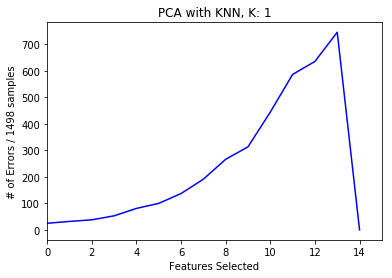

K value: 4
PCA features removed = 0
K value:  4
Elapsed testing time in seconds: 5.750551699999988
total error rate =  0.0267022696929239
Confusion Matrix:
[[813   6]
 [ 34 645]]
............................................................
PCA features removed = 1
K value:  4
Elapsed testing time in seconds: 5.927220399999982
total error rate =  0.029372496662216287
Confusion Matrix:
[[813   6]
 [ 38 641]]
............................................................
PCA features removed = 2
K value:  4
Elapsed testing time in seconds: 5.760120499999999
total error rate =  0.03471295060080107
Confusion Matrix:
[[811   8]
 [ 44 635]]
............................................................
PCA features removed = 3
K value:  4
Elapsed testing time in seconds: 5.7428012999999964
total error rate =  0.050734312416555405
Confusion Matrix:
[[809  10]
 [ 66 613]]
............................................................
PCA features removed = 4
K value:  4
Elapsed testing time in second

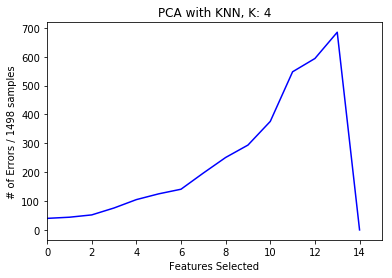

K value: 7
PCA features removed = 0
K value:  7
Elapsed testing time in seconds: 5.8472136999999975
total error rate =  0.02870493991989319
Confusion Matrix:
[[800  19]
 [ 24 655]]
............................................................
PCA features removed = 1
K value:  7
Elapsed testing time in seconds: 6.152521200000024
total error rate =  0.03137516688918558
Confusion Matrix:
[[799  20]
 [ 27 652]]
............................................................
PCA features removed = 2
K value:  7
Elapsed testing time in seconds: 5.735838399999977
total error rate =  0.035380507343124167
Confusion Matrix:
[[799  20]
 [ 33 646]]
............................................................
PCA features removed = 3
K value:  7
Elapsed testing time in seconds: 5.934509999999989
total error rate =  0.056074766355140186
Confusion Matrix:
[[788  31]
 [ 53 626]]
............................................................
PCA features removed = 4
K value:  7
Elapsed testing time in secon

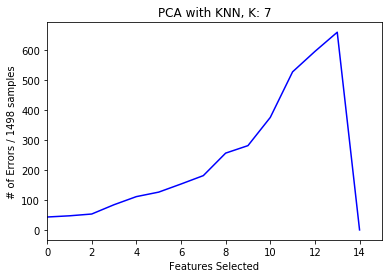

K value: 10
PCA features removed = 0
K value:  10
Elapsed testing time in seconds: 5.788394100000005
total error rate =  0.037383177570093455
Confusion Matrix:
[[802  17]
 [ 39 640]]
............................................................
PCA features removed = 1
K value:  10
Elapsed testing time in seconds: 5.658825700000023
total error rate =  0.04205607476635514
Confusion Matrix:
[[799  20]
 [ 43 636]]
............................................................
PCA features removed = 2
K value:  10
Elapsed testing time in seconds: 5.858359099999973
total error rate =  0.044058744993324434
Confusion Matrix:
[[803  16]
 [ 50 629]]
............................................................
PCA features removed = 3
K value:  10
Elapsed testing time in seconds: 5.854244999999992
total error rate =  0.062082777036048066
Confusion Matrix:
[[794  25]
 [ 68 611]]
............................................................
PCA features removed = 4
K value:  10
Elapsed testing time in

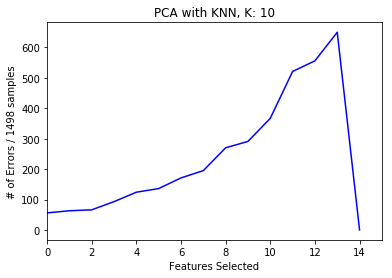

K value: 13
PCA features removed = 0
K value:  13
Elapsed testing time in seconds: 5.637455400000022
total error rate =  0.03871829105473965
Confusion Matrix:
[[795  24]
 [ 34 645]]
............................................................
PCA features removed = 1
K value:  13
Elapsed testing time in seconds: 5.971414299999992
total error rate =  0.04806408544726302
Confusion Matrix:
[[787  32]
 [ 40 639]]
............................................................
PCA features removed = 2
K value:  13
Elapsed testing time in seconds: 5.843885899999975
total error rate =  0.049399198931909215
Confusion Matrix:
[[787  32]
 [ 42 637]]
............................................................
PCA features removed = 3
K value:  13
Elapsed testing time in seconds: 5.861187099999995
total error rate =  0.06408544726301736
Confusion Matrix:
[[780  39]
 [ 57 622]]
............................................................
PCA features removed = 4
K value:  13
Elapsed testing time in s

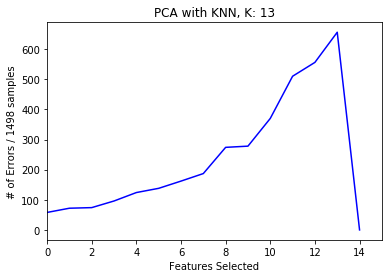

In [12]:
print('Performing PCA with KNN')

for K in range (1,15,3):   
    print("K value:", K)
    error = np.zeros((15,1))
    for i in range (0,14):
        #print("\n")
        #print('............................................................')
        PCA = PCA_func(train_data, num_feats=14, reduce=1, reduce_by=i)
        #print('............................................................')
        #print('PCA features removed:', i)
        #print('reconstructed data:')
        #print(PCA)
        #print('............................................................')
        print('PCA features removed =',i)
        #print('Shape of testing data is: ', test_data.shape)
        confusion_matrix, error_knn1 = KNN_func(PCA, train_label, test_data, test_label,K)
        print('Confusion Matrix:')
        print(confusion_matrix)
        print('............................................................')
        error[i] = error_knn1

    plt.figure()
    plt.plot(error, c='b')
    ax=plt.gca()
    ax.set_xlim(0,15)
    #ax.set_ylim(500,700)
    plt.title('PCA with KNN, K: %i' %K)
    plt.xlabel("Features Selected")
    plt.ylabel("# of Errors / 1498 samples")
    plt.show()    

# Approach 2: Forward Search

#### Implementing Forward Search

In [139]:
## this one is kept becasue fwd_func was occasionally giving errors and this helps get around some issues.

def fwd_func(train_datas, train_labels, test_datas, num_feat, feats_selected):
    #num_feat = total features available
    #feats_selected = number of features you want to choose

    feat_len = train_datas.shape[0]
    test_len = test_datas.shape[0]
    feat_sel_range = feats_selected +1
    num_feat_range = num_feat +1
    bestFeature = 100*np.ones(feat_sel_range)
    index_of_errors = np.ones(feat_sel_range)
    
    
    for iteration in range(0,feat_sel_range):
        if iteration == 0:
            Xselection = np.zeros((feat_len,1))
        else:
            Xselection = np.concatenate((Xselection, np.zeros((feat_len,1))), axis = 1)

        error  = 10000*np.ones(num_feat)
        for feature in range(num_feat):

            # have not used the feature before
            if(not(feature in bestFeature )):

                    #add a feature to the existing features
                    Xselection[:,iteration] = train_datas[:,feature]

                    #classify using Xselection
                    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
                    lda.fit(Xselection,train_labels)
                    prediction = lda.predict(Xselection)
                    error[feature] = sum(abs(prediction - train_labels))

        bestFeature[iteration] = np.argmin(error)
        temp = np.argmin(error)
        index_of_errors[iteration] = temp
        print('error:', error)
        
        Xselection[:, iteration] = train_datas[:,int(bestFeature[iteration])]
    
    return Xselection, index_of_errors

In [13]:
# Defining the linear discriminant analysis function
def FLD_func(train_inputs, train_labels, test_inputs, test_labels):
    
    tic = time.clock()
    # training set result without feature selection
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    #training
    lda.fit(train_inputs, train_labels)
    toc = time.clock()
    print('Elapsed training time in seconds:', (toc - tic))
    
    tic = time.clock()
    #testing
    prediction = lda.predict(test_inputs)
    toc = time.clock()
    print('Elapsed testing time in seconds:', (toc - tic))
    
    error = sum(abs(prediction - test_labels))
    print("total error rate = ", error/len(test_inputs))
    

    Conf_mat = sklearn.metrics.confusion_matrix(test_labels, prediction, labels=None, sample_weight=None, normalize=None)
    
    return Conf_mat, error 
    
    

In [14]:
def fwd_func1(train_datas, train_labels, test_datas, num_feat, feats_selected):
    #num_feat = total features available
    #feats_selected = number of features you want to choose

    feat_len = train_datas.shape[0]
    test_len = test_datas.shape[0]
    feat_sel_range = feats_selected +1
    num_feat_range = num_feat +1
    bestFeature = 100*np.ones(feat_sel_range)
    index_of_errors = np.ones(feat_sel_range)
    
    for iteration in range(0,feat_sel_range):
        if iteration == 0:
            Xselection = np.zeros((feat_len,1))
            Tselection = np.zeros((test_len,1))
        else:
            Xselection = np.concatenate((Xselection, np.zeros((feat_len,1))), axis = 1)
            Tselection = np.concatenate((Tselection, np.zeros((test_len,1))), axis = 1)
        
        error  = 10000*np.ones(num_feat)
        for feature in range(num_feat):

            # have not used the feature before
            if(not(feature in bestFeature )):

                    #add a feature to the existing features
                    Xselection[:,iteration] = train_datas[:,feature]

                    #classify using Xselection
                    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
                    lda.fit(Xselection,train_labels)
                    prediction = lda.predict(Xselection)
                    error[feature] = sum(abs(prediction - train_labels))

        bestFeature[iteration] = np.argmin(error)
        temp = np.argmin(error)
        index_of_errors[iteration] = temp
        #print('error:', error)
        
        Xselection[:, iteration] = train_datas[:,int(bestFeature[iteration])]
        Tselection[:, iteration] = test_datas[:,int(bestFeature[iteration])]
    
    return Xselection, index_of_errors, Tselection

### Performing FWD Search with LDA

Performing Forward Feature Selection with LDA
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed training time in seconds: 0.00878320000003896
Elapsed testing time in seconds: 0.0002108999999563821
total error rate =  0.42990654205607476
Confusion Matrix: 
[[782  37]
 [607  72]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed training time in seconds: 0.007735799999977644
Elapsed testing time in seconds: 0.00032380000004650356
total error rate =  0.4172229639519359
Confusion Matrix: 
[[750  69]
 [556 123]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed training time in seconds: 0.010831699999926059
Elapsed testing time in seconds: 0.00024580000001606095
total error rate =  0.4192256341789052
Confusion Matrix: 
[[754  65]
 [563 116]]
........................................

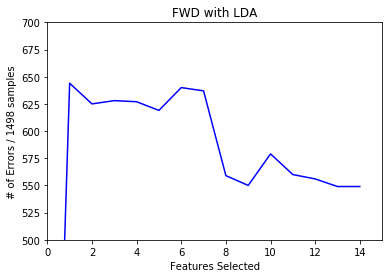

In [15]:
length = test_data.shape[0]
error = np.zeros((15,1))
print('Performing Forward Feature Selection with LDA')
for i in range (1,15):
    #print("\n")
    #print('............................................................')
    FWD, ind, testdata= fwd_func1(train_data, train_label, test_data, 14, i)
    #print('............................................................')
    print('features selected:', i)
    #print('new dataset:')
    #print('FWD search features selected: ')
    #print(FWD)
    print('Index position of features selected: ')
    print(ind)
    #print('FWD search features (for test set) selected: ')
    #print(testdata)
    #print('............................................................')
    #print('Features selected =',i)
    #print('Shape of testing data is: ', testdata.shape)
    confusion_matrix, error_fld = FLD_func(FWD, train_label, testdata, test_label)
    print('Confusion Matrix: ')
    print(confusion_matrix)
    print('............................................................')
    error[i] = error_fld
    
plt.figure()
plt.plot(error, c='b')
ax=plt.gca()
ax.set_xlim(0,15)
ax.set_ylim(500,700)
plt.title('FWD with LDA')
plt.xlabel("Features Selected")
plt.ylabel("# of Errors / 1498 samples")
plt.show()

In [16]:
def KNN_func (train_datas, train_labels, test_datas, test_labels, K):
    Xtrain = train_datas
    Xtest = test_datas
    Xctrain =train_labels
    Xctest = test_labels

    length_train = train_datas.shape[0]
    length_test = test_datas.shape[0]

    k = K
    dist = np.zeros(length_train)
    errors = np.zeros(length_test)
    conf = np.zeros(length_test)
    tic = time.clock()
    for i in range(length_test):

        dist = np.sum((Xtrain - Xtest[i,:])**2,axis = 1)**0.5
        sortIndex = np.argsort(dist)
        bestLabels = Xctrain[sortIndex[0:k]]

        prediction = (sum(bestLabels) > k/2.0)*1.0
        conf[i] = prediction
        errors[i] = (Xctest[i] != prediction)*1.0

    toc = time.clock()
    print('Elapsed testing time in seconds:', (toc - tic))

    #confusion Matrix
    Conf_mat = sklearn.metrics.confusion_matrix(Xctest, conf, labels=[1,0], sample_weight=None, normalize=None)
    print("total error rate = ", np.sum(errors)/len(test_datas))
    
    wrongs = np.sum(errors)
    
    #return
    return Conf_mat, wrongs

    

### Performing Feature Selection with KNN

K value: 1
Performing Forward Feature Selection with KNN
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed testing time in seconds: 1.9206109000000424
total error rate =  0.4319092122830441
Confusion Matrix:
[[335 344]
 [303 516]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed testing time in seconds: 2.0451173000000153
total error rate =  0.3991989319092123
Confusion Matrix:
[[362 317]
 [281 538]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed testing time in seconds: 2.0600498000000016
total error rate =  0.33377837116154874
Confusion Matrix:
[[423 256]
 [244 575]]
............................................................
features selected: 4
Index position of features selected: 
[ 1.  9. 11.  7.  4.]
Elapsed testing time in seconds: 2.179244600000061
total error ra

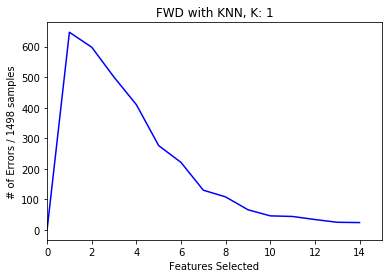

K value: 4
Performing Forward Feature Selection with KNN
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed testing time in seconds: 2.049403199999915
total error rate =  0.4152202937249666
Confusion Matrix:
[[230 449]
 [173 646]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed testing time in seconds: 2.161128500000018
total error rate =  0.36181575433911883
Confusion Matrix:
[[280 399]
 [143 676]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed testing time in seconds: 2.1600202000000763
total error rate =  0.3030707610146863
Confusion Matrix:
[[343 336]
 [118 701]]
............................................................
features selected: 4
Index position of features selected: 
[ 1.  9. 11.  7.  4.]
Elapsed testing time in seconds: 2.182584600000041
total error rate

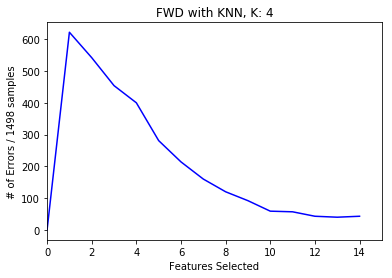

K value: 7
Performing Forward Feature Selection with KNN
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed testing time in seconds: 2.1003732000000355
total error rate =  0.42990654205607476
Confusion Matrix:
[[307 372]
 [272 547]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed testing time in seconds: 2.1623612000000776
total error rate =  0.3591455273698264
Confusion Matrix:
[[366 313]
 [225 594]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed testing time in seconds: 2.137676699999929
total error rate =  0.31108144192256343
Confusion Matrix:
[[422 257]
 [209 610]]
............................................................
features selected: 4
Index position of features selected: 
[ 1.  9. 11.  7.  4.]
Elapsed testing time in seconds: 2.2766955000000735
total error r

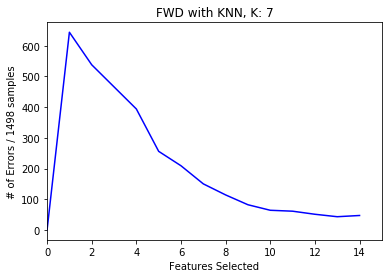

K value: 10
Performing Forward Feature Selection with KNN
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed testing time in seconds: 2.121192800000017
total error rate =  0.4145527369826435
Confusion Matrix:
[[241 438]
 [183 636]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed testing time in seconds: 2.105832599999985
total error rate =  0.3404539385847797
Confusion Matrix:
[[312 367]
 [143 676]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed testing time in seconds: 2.136166600000024
total error rate =  0.30507343124165553
Confusion Matrix:
[[364 315]
 [142 677]]
............................................................
features selected: 4
Index position of features selected: 
[ 1.  9. 11.  7.  4.]
Elapsed testing time in seconds: 2.2249517000000196
total error rat

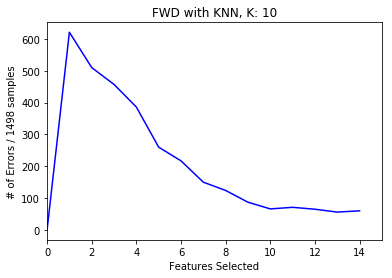

K value: 13
Performing Forward Feature Selection with KNN
features selected: 1
Index position of features selected: 
[1. 9.]
Elapsed testing time in seconds: 2.026522699999987
total error rate =  0.40921228304405877
Confusion Matrix:
[[298 381]
 [232 587]]
............................................................
features selected: 2
Index position of features selected: 
[ 1.  9. 11.]
Elapsed testing time in seconds: 2.103335799999968
total error rate =  0.35647530040053405
Confusion Matrix:
[[350 329]
 [205 614]]
............................................................
features selected: 3
Index position of features selected: 
[ 1.  9. 11.  7.]
Elapsed testing time in seconds: 2.2054203000000143
total error rate =  0.31241655540720964
Confusion Matrix:
[[401 278]
 [190 629]]
............................................................
features selected: 4
Index position of features selected: 
[ 1.  9. 11.  7.  4.]
Elapsed testing time in seconds: 2.315771199999972
total error r

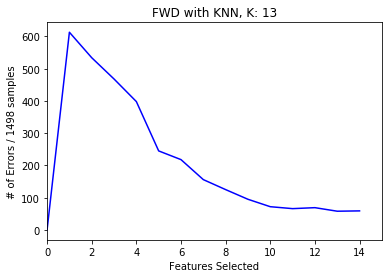

In [17]:
length = test_data.shape[0]
for K in range (1,15,3):   
    print("K value:", K)
    error = np.zeros((15,1))
    print('Performing Forward Feature Selection with KNN')
    for i in range (1,15):
        #print("\n")
        #print('............................................................')
        FWD, ind, testdata= fwd_func1(train_data, train_label, test_data, 14, i)
        #print('............................................................')
        print('features selected:', i)
        #print('new dataset:')
        #print('FWD search features selected: ')
        #print(FWD)
        print('Index position of features selected: ')
        print(ind)
        #print('FWD search features (for test set) selected: ')
        #print(testdata)
        #print('............................................................')
        #print('Features selected =',i)
        #print('Shape of testing data is: ', testdata.shape)
        confusion_matrix, error_knn = KNN_func(FWD, train_label, testdata, test_label,K)
        print('Confusion Matrix:')
        print(confusion_matrix)
        print('............................................................')
        error[i] = error_knn

    plt.figure()
    plt.plot(error, c='b')
    ax=plt.gca()
    ax.set_xlim(0,15)
    #ax.set_ylim(500,700)
    plt.title('FWD with KNN, K: %i' %K)
    plt.xlabel("Features Selected")
    plt.ylabel("# of Errors / 1498 samples")
    plt.show()